<a href="https://colab.research.google.com/github/yudhiesh1997/Hands-On-Machine-Learning/blob/master/handsonMLCH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

**DESCR** to describe the dataset 

**keys** containing an array with one row per instance and one column per feature 

**target** key containing an array with the labels 

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

There are 70,000 images and each image has 784 features (28 x 28 x 3)


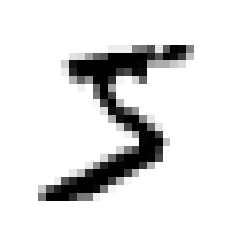

In [4]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_reshape = some_digit.reshape(28,28)

plt.imshow(some_digit_reshape, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
y[0]

'5'

Note that the label is a string but ML algorithms expect it to be in numbers so cast it to an integer 



In [6]:
import numpy as np

y = y.astype(np.uint8)

Remember to split the data into test and train images before inspecting the data any further 

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Also the data has already been shuffled so there is no need to do it and this ensures that the data is in an even distribution. 

Moreover, some algorithms are sensitive to the order of the training instances, and they perform poorly if they similar instances of the data in a row. 

Even though the data consists of 10 numbers here I will be training a much simpler binary classifier before going on into a multiclass classsification problem 

In [8]:
y_train_5 = (y_train == 5) # True for all fives and false for the rest 
y_test_5 = (y_test == 5)

Here I will use the Stochastic Gradient Descent Classifier to start with 

It has the advantages of being capable of handling very large datasets efficiently 

This is due to it handling training instances independently 

In [9]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state = 42)
sgd.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd.predict([some_digit])

array([ True])

This example managed to guess that the image at position 1 was a 5 which is true 

**Performance Measures**

Evaluating a classifier is much more difficult than a regressor. 

Using K-fold cross-validation to evaluate the model 

This method means splitting the data into K folds where the model is evaluated on each fold using a model trained on the remaining folds 

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, X_train, y_train_5, cv=3, scoring ="accuracy")

array([0.95035, 0.96035, 0.9604 ])

The model got about a 93% accuracy but wait is it any good?

In [12]:
# Test it out on a dumb classifier 
from sklearn.base import BaseEstimator

class dumb_classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

dumb = dumb_classifier()
cross_val_score(dumb, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

Hmm the model gets about 90% accuracy. 

This is due to the dataset having 10% of its data belonging to number 5's 

So the dumb classifier is making every classification not a 5 then it will be right about 90% of the time. 

This shows that accuracy is not the best method to test how a classification model performs 

In [13]:
# The Confusion Matrix 
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv = 3)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Each row represents an actual class 

(From top left)
True Positives  False Positives 
False Negatives True Negatives 


Precision = TP / TP + FP

Precision measures how accurate the model performs on its classifications 

Recall = TP / TP + FN 

Recall measures how the model performed on classification of the whole data i.e. includes the classification cases where the model did not classify the intended the output.

In [15]:
from sklearn.metrics import precision_score, recall_score


print("Precision score :" ) 
precision_score(y_train_5, y_train_pred)




Precision score :


0.8370879772350012

In [16]:
print("Recall score: ")
recall_score(y_train_5, y_train_pred)

Recall score: 


0.6511713705958311

To compare the two you can use the F1 score 

F1 = 2 * (PR/P+R)

In [17]:
from sklearn.metrics import f1_score 

print("F1 score :")
f1_score(y_train_5, y_train_pred)

F1 score :


0.7325171197343846

The F1 score favors classifiers that have a similar Precision and Recall value but its not always that you want a classifier that has a good F1 score 

For example, say you are building a system for Youtube to detect videos that are not safe for viewing for childern. You would want the classifier to have a high precision where it will be letting a very low amount of unsafe videos to pass through.

But if you are building a classifier to detect shoplifters in a store then you might want a classifier that has a very high recall where it might make a few false alarms but overall it identifies most of them. 

Thresholding in Precision and Recall 

SGD Classifier has a decision function which acts as a sort of a threshold. The higher the threshold the more precise the classifier and the vice versa. 




In [18]:
y_score = sgd.decision_function([some_digit])
y_score

array([2164.22030239])

In [19]:
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [20]:
threshold = 8000
y_some_digit_pred_ = (y_score > threshold)
y_some_digit_pred_

array([False])

This confirms that raising the threshold increases recall but decreases precision

In [21]:
# How to decide which threshold to use?

y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3, method="decision_function")

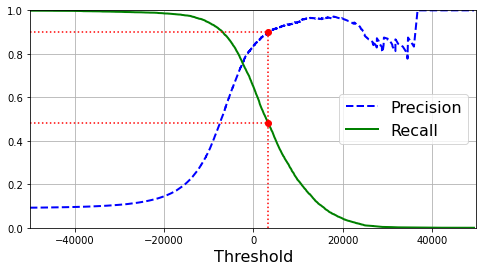

In [22]:
# Plot the precision recall curve 
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
                                                         
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
# save_fig("precision_recall_vs_threshold_plot")                                              
plt.show()

Precision is bumpy because it may sometimes go down when you raise the threshold 



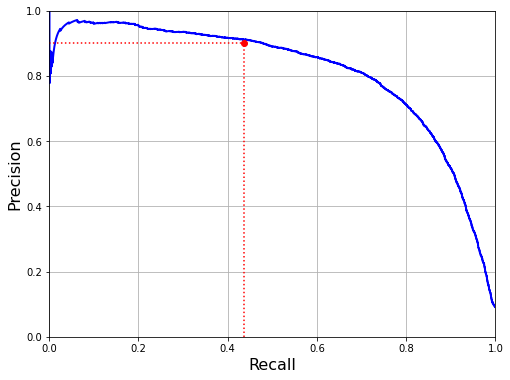

In [23]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
# save_fig("precision_vs_recall_plot")
plt.show()

If you want to train for 90% precision you can search for the lowest threshold that gives you 90% precision 

In [24]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [25]:
threshold_90_precision
# This is the threshold value 

3370.0194991439557

In [26]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [27]:
print("Precision: ")
precision_score(y_train_5, y_train_pred_90)

Precision: 


0.9000345901072293

In [28]:
print("Recall: ")
recall_score(y_train_5, y_train_pred_90)

Recall: 


0.4799852425751706

# The ROC Curve 

The receiver operating characteristics curve is a common tool used to evaluate binary classifiers 

It plots the true positive rate vs the false positive rate 
(FPR = 1 - True Negative Rate)

TNR = Specificity

Therefore the ROC curve plots the sensitivity (recall) vs 1 - specificity  


In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

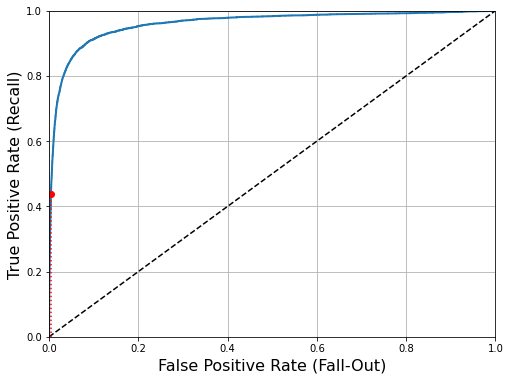

In [30]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
# save_fig("roc_curve_plot")                       
plt.show()

Method to compare multiple classfiers on the ROC curve is to compare their AUC or Area Under Curve 

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

# PR curve or ROC curve?

PR curve is better when the positive class is very rare. For example, when detecting whether tumors are malignant or benign. Here you might have 98% of your data containing negative class.

Otherwise use a ROC curve

In [32]:
# Try with Random Forest 
# The Random Forest Classifier does not have a decision function 
# Instead it uses a predict_proba() which returns an array containing a row per instance and a column per class 
# Containing the probability that the given instance belongs to the given class 

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

In [33]:
# The roc_curve() expects labels and scores so insted of scores you can give it class probabilities 

y_scores_forest = y_probas_forest[:, 1] 
# score = proba of a positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

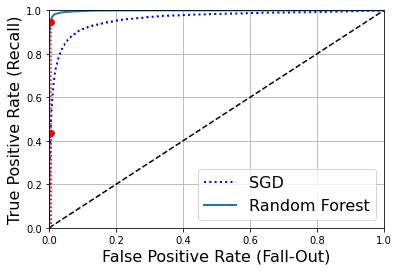

In [34]:
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
# save_fig("roc_curve_comparison_plot")
plt.show()

In [35]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [36]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

print("Precision score: ")
precision_score(y_train_5, y_train_pred_forest)

Precision score: 


0.9905083315756169

In [37]:
print("Recall score: ")
recall_score(y_train_5, y_train_pred_forest)

Recall score: 


0.8662608374838591

The Random Forest performs much better than the SGD Classifier!

# Multiclass Classification 

Algorithms such as SGD, Random Forest classifiers and naive Bayes classifiers are capable of handling multiple classes natively 

Another way is to use binary classifiers such as Support Vector Machines and Logistic Regression for multiclass classification by combining multiple binary classifiers together. For example using 10 binary clssifiers for each class in the MNIST dataset. 

This is called a one-versus-the-rest (OvR) strategy

Or you could train a binary classifier on a pair of numbers. 
One for classfying 0's and 1's etc. 
This is called a one-versus-one (OvO) strategy.
If there are N classes then you need to train N x (N-1) / 2

SVM's scale poorly with the size of the training set so OvO is preferred as it is faster to train many classifiers on small training sets than to train few classifiers on large training sets. 
 

In [38]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [39]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [40]:
# It returns 10 scores for each class and to get the prediction of the model on that digit
# find the argmax 
np.argmax([some_digit_scores])

5

In [41]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [42]:
svm_clf.classes_[5]

5

By default the SVC model uses the OvO method 

Here I will use the OvR strategy 

In [43]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [44]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [45]:
len(ovr_clf.estimators_)

10

In [46]:
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
sgd.predict([some_digit])

array([3], dtype=uint8)

In [48]:
sgd.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [49]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [50]:
from sklearn.preprocessing import StandardScaler
# Scaling the data improves the performance 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring= "accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis

Here I assume that the model I found is the best one for the purposes of this classification task 

So now it is time to analyze the types of errors it makes in order to imporve it 

In [51]:
# First look at the confusion matrix 

y_train_pred = cross_val_predict(sgd, X_train_scaled, y_train, cv=3)


In [52]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

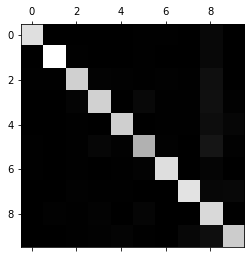

In [53]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()


This confusion matrix looks good but notice that the number 5 has a slightly lighter colour compared to the rest of the numbers 

This could indicate that their are less 5's in the trainig data!

Here I need to compare the error based on the number of images each value has 

This is to compare the error rates instead of comparing the absolute values of the errors 

In [54]:
row_sums = conf_matrix.sum(axis=1, keepdims= True)
norm_conf_mx = conf_matrix / row_sums 

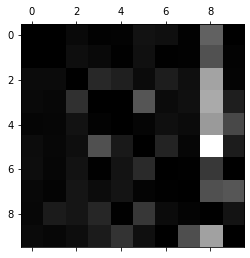

In [55]:
np.fill_diagonal(norm_conf_mx, 0) 
plt.matshow(norm_conf_mx, cmap=plt.cm.gray) 
plt.show()
# Fill the diagonals with zeros so that it is easier to see the errors 


The rows represent the actual class and the columns represent the predicted class 

So based off of this confusion matrix it seems that the model has a lof of false positives for the number 8 

Whereas in the row of number 8 it does not seem to indicate and abnormalities so it shows that it does pretty on classfying the number 8 

With this confusion matrix I see that I need to spend more time focusing on improving the models performance on classfying the number 8

Things I could do :

1) Get more training data 

2) Engineer new features 

3) Preprocess the images 

In [56]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

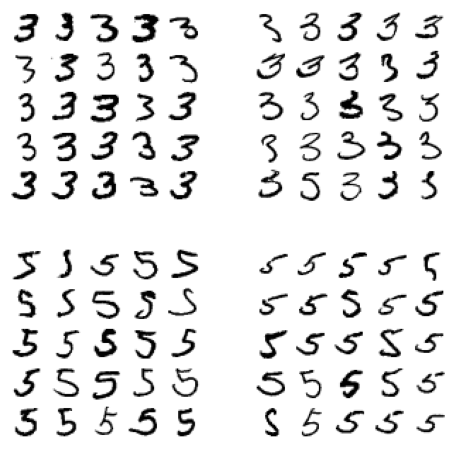

In [57]:
# Analyzing individual errors can give you better insight as to why the model is not performing as intended 
import matplotlib.pyplot as plt

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] 
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] 
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] 
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5) 
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5) 
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5) 
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5) 
plt.show()

# Multilabel Classification 

A classification system that outputs multiple binary tag is called a multilabel classification system. 



In [58]:

from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [2]:
from sklearn.model_selection import cross_val_predict

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

NameError: ignored

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# Multioutput Classification 

It is a generalizarion of multilabel classification where each label can be multiclass i.e it can have more than two possible values 

To show this here is a system that removes noise from images 

It will take in a noisy image and output a clean digit image 


In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784)) 
X_test_mod = X_test + noise
y_train_mod = X_train y_test_mod = X_test


In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)